<a href="https://colab.research.google.com/github/badrinarayanan02/Predictive-Analytics/blob/main/2348507_PALab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Clustering Algorithm

Clustering the group of customers in a mall by considering the features like Purchasing Behavior's etc. By doing this a mall can enhance their business strategies. It is an unsupervised machine learning approach.


### Loading the Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Data Collection and Analysis

In [4]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
customer_data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
customer_data.shape

(200, 5)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Inference

There are no missing values in the dataset.

Choosing the Annual Income and Spending Score Column

In [12]:
X = customer_data.iloc[:,[3,4]].values

In [16]:
print(X[9])

[19 72]


### Choosing the Correct Number of Clusters


WCSS - Within Cluster Sum of Squares

The data points should be closer to the centroid. The distance betweeen the points and the centroid should be very less then it can be considered as a good cluster.

In [19]:
 wcss = []

 for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

### Elbow / Cut of Point Graph

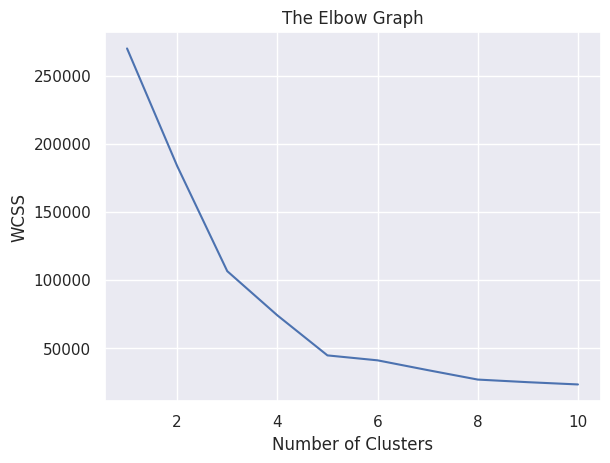

In [20]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Inference

The optimum number of clusters is 5. After that there is no significant drop.

### Training K-Means Clustering Model

In [53]:
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state=42)

In [54]:
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualizing the Clusters

Plotting all the clusters and their centroids

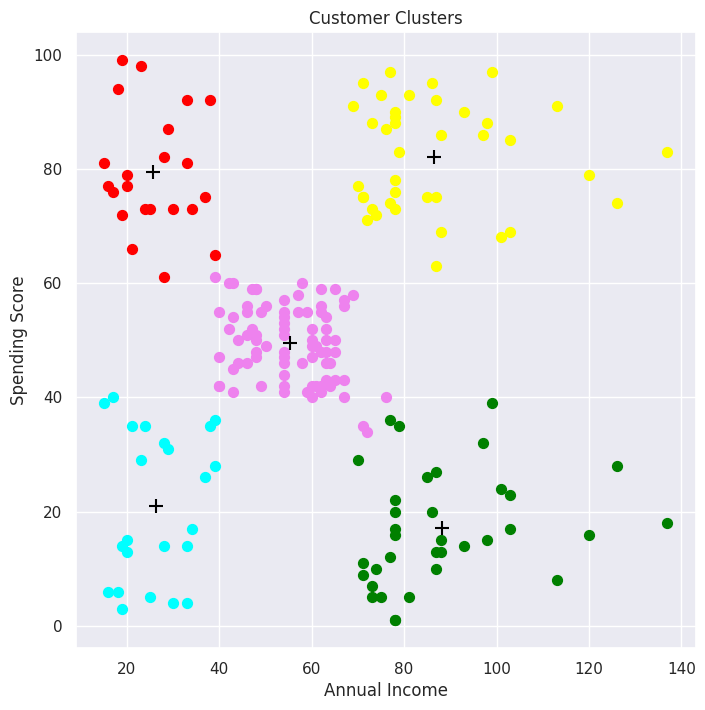

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50,c='violet', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50,c='yellow', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50,c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50,c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50,c='cyan', label='Cluster 5')

# Plotting the Centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='black',label='Centriods', marker='+')

plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


### Inference

5 groups of customers has been segmented. All these clusters are partitioned in a good way. Except some points all the data points are nearing it's centroid. The cluster 3 that is represented in red colour, those peoples having less annual income but they are spending a lot. The blue colour segmented peoples have less annual income, of course they will be spending less.

The Mall can give offers to people who are spending less (peoples in blue and green). The people will tend to buy more. By doing this strategy the mall can be benefitted. We can make better recommendations.

### Evaluation

In [56]:
silhouette_avg = silhouette_score(X,Y)
print("Silhouette Score: ",silhouette_avg)

Silhouette Score:  0.553931997444648


# Conclusion

Thus the Customer Segmentation using K-Means clustering algorithm has been implemented. Initially loaded the data, did some analysis. Extracted the specific features, and chosen the correct number of clusters by wcss based on cut off point graph. Trained the K-Means Model and then Visualized the clusters to get more insights about the customers. The mall can enhance their business strategy by providing offers to those peoples who have the less annual income and less spending score.